## Big Iot Healthcare Data Analytics using Deep Learning and Machine Learning

In [3]:
!pip install  neurokit2

In [4]:
import warnings
warnings.filterwarnings('ignore')
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Simulated_ECG = nk.ecg_simulate(duration=15, sampling_rate=200,noise=0.01, heart_rate=100)
Simulated_ECG

array([1.1286344 , 1.01761339, 0.74382499, ..., 0.22745569, 0.53706692,
       0.85568054])

In [6]:
print(len(Simulated_ECG))

3000


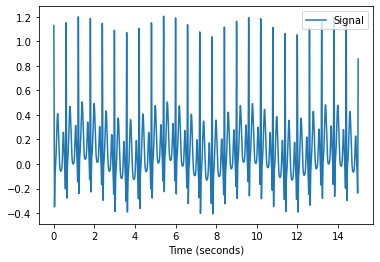

In [7]:
nk.signal_plot(Simulated_ECG, sampling_rate=200)

In [8]:
data_healthcare=pd.DataFrame(Simulated_ECG,columns=["ECG"])

In [9]:
data_healthcare

,ECG
0,1.128634
1,1.017613
2,0.743825
3,0.396882
4,0.073943
...,...
2995,-0.173889
2996,-0.018366
2997,0.227456
2998,0.537067


In [10]:
rsp_sim = nk.rsp_simulate(duration=15, sampling_rate=200,noise=0.01,respiratory_rate=100, method="sinusoidal")

In [11]:
rsp_sim.reshape(3000,1)

array([[ 0.00711017],
       [ 0.03320715],
       [ 0.05909851],
       ...,
       [-0.10426129],
       [-0.07865216],
       [-0.05267467]])

In [12]:
len(rsp_sim)

3000

In [13]:
data_healthcare.insert(1,"RSP",rsp_sim,True)

In [14]:
data_healthcare

,ECG,RSP
0,1.128634,0.007110
1,1.017613,0.033207
2,0.743825,0.059099
3,0.396882,0.084725
4,0.073943,0.110027
...,...,...
2995,-0.173889,-0.154165
2996,-0.018366,-0.129450
2997,0.227456,-0.104261
2998,0.537067,-0.078652


In [15]:
import pandas as pd
import numpy as np
# create a random number generator that will be used to set the randomness
rng = np.random.RandomState(1)
temp_min, temp_max =96,99
body_temp = rng.uniform(temp_min, temp_max, size=3000)
body_temp

array([97.25106601, 98.16097348, 96.00034312, ..., 97.31861731,
       96.50543091, 97.58726163])

In [16]:
data_healthcare.insert(1,"body_temp",body_temp,True)

In [17]:
data_healthcare

,ECG,body_temp,RSP
0,1.128634,97.251066,0.007110
1,1.017613,98.160973,0.033207
2,0.743825,96.000343,0.059099
3,0.396882,96.906998,0.084725
4,0.073943,96.440268,0.110027
...,...,...,...
2995,-0.173889,98.508529,-0.154165
2996,-0.018366,96.642441,-0.129450
2997,0.227456,97.318617,-0.104261
2998,0.537067,96.505431,-0.078652


In [18]:
pip install simglucose

  Created wheel for simglucose: filename=simglucose-0.2.3-py3-none-any.whl size=42479 sha256=4ec892a858d9f34ad15b3ca4ac02c0a7812362549ad4ce747e997f4c628fdb8d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a4\7d\0a\91a450aa30cf95ddcfff95baf0e1db6e3d278822a3bf071f53
  Created wheel for gym: filename=gym-0.9.4-py3-none-any.whl size=215478 sha256=0f9602a8e0a857590c8205d72c7676712534f57772714311281d1c12556a26c3
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\51\ae\71\c6d85ee6f2a71f6b3c6f895fe6498c5bc62b0064991d08a536
Successfully built simglucose gym
Note: you may need to restart the kernel to use updated packages.


In [19]:
from simglucose.simulation.env import T1DSimEnv
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.scenario import CustomScenario
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from datetime import timedelta
from datetime import datetime

# specify start_time as the beginning of today
dt = datetime(2022,5,20,22,16,0)
now = datetime.now()
print(now)
start_time = datetime.combine(dt.date(), datetime.min.time())

# --------- Create Random Scenario --------------
# Specify results saving path
path = './results'

# Create a simulation environment
patient = T1DPatient.withName('adolescent#001')
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')
scenario = RandomScenario(start_time=start_time, seed=1)
env = T1DSimEnv(patient, sensor, pump, scenario)

# Create a controller
controller = BBController()

# Put them together to create a simulation object
s1 = SimObj(env, controller, timedelta(days=7), animate=False, path=path)
results1 = sim(s1)
print(results1)
data2=pd.DataFrame(results1)

2022-08-09 15:04:36.647379
Process ID: 9492
Simulation starts ...
Simulation Completed!
                             BG         CGM  CHO   insulin      LBGI  \
Time                                                                   
2022-05-20 00:00:00  149.020000  165.793949  0.0  0.013933  0.000000   
2022-05-20 00:03:00  149.020000  161.582022  0.0  0.013933  0.000000   
2022-05-20 00:06:00  149.020000  159.239373  0.0  0.013933  0.000000   
2022-05-20 00:09:00  149.020000  157.472710  0.0  0.013933  0.000000   
2022-05-20 00:12:00  149.020000  156.108950  0.0  0.013933  0.000000   
...                         ...         ...  ...       ...       ...   
2022-05-26 23:48:00   89.506730   82.020860  0.0  0.013933  1.810508   
2022-05-26 23:51:00   90.019792   83.620499  0.0  0.013933  1.721358   
2022-05-26 23:54:00   90.533411   85.494805  0.0  0.013933  1.634845   
2022-05-26 23:57:00   91.047723   87.698967  0.0  0.013933  1.550913   
2022-05-27 00:00:00   91.562845   90.154322  NaN

In [20]:
data2

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk
Time,,,,,,,
2022-05-20 00:00:00,149.020000,165.793949,0.0,0.013933,0.000000,2.755276,2.755276
2022-05-20 00:03:00,149.020000,161.582022,0.0,0.013933,0.000000,2.755276,2.755276
2022-05-20 00:06:00,149.020000,159.239373,0.0,0.013933,0.000000,2.755276,2.755276
2022-05-20 00:09:00,149.020000,157.472710,0.0,0.013933,0.000000,2.755276,2.755276
2022-05-20 00:12:00,149.020000,156.108950,0.0,0.013933,0.000000,2.755276,2.755276
...,...,...,...,...,...,...,...
2022-05-26 23:48:00,89.506730,82.020860,0.0,0.013933,1.810508,0.000000,1.810508
2022-05-26 23:51:00,90.019792,83.620499,0.0,0.013933,1.721358,0.000000,1.721358
2022-05-26 23:54:00,90.533411,85.494805,0.0,0.013933,1.634845,0.000000,1.634845


In [21]:
data_glucose_insulin=data2[["CGM","insulin"]]

In [22]:
data_glucose_insulin

,CGM,insulin
Time,,
2022-05-20 00:00:00,165.793949,0.013933
2022-05-20 00:03:00,161.582022,0.013933
2022-05-20 00:06:00,159.239373,0.013933
2022-05-20 00:09:00,157.472710,0.013933
2022-05-20 00:12:00,156.108950,0.013933
...,...,...
2022-05-26 23:48:00,82.020860,0.013933
2022-05-26 23:51:00,83.620499,0.013933
2022-05-26 23:54:00,85.494805,0.013933


In [23]:
data_glucose_insulin_V2=data_glucose_insulin.reset_index()

In [24]:
data_glucose_insulin_V2

,Time,CGM,insulin
0,2022-05-20 00:00:00,165.793949,0.013933
1,2022-05-20 00:03:00,161.582022,0.013933
2,2022-05-20 00:06:00,159.239373,0.013933
3,2022-05-20 00:09:00,157.472710,0.013933
4,2022-05-20 00:12:00,156.108950,0.013933
...,...,...,...
3356,2022-05-26 23:48:00,82.020860,0.013933
3357,2022-05-26 23:51:00,83.620499,0.013933
3358,2022-05-26 23:54:00,85.494805,0.013933
3359,2022-05-26 23:57:00,87.698967,0.013933


In [25]:
data_glucose_insulin_V2=data_glucose_insulin_V2[:3000]

In [26]:
data_glucose_insulin_V3=data_glucose_insulin_V2[["CGM","insulin"]]

In [27]:
data_glucose_insulin_V3

,CGM,insulin
0,165.793949,0.013933
1,161.582022,0.013933
2,159.239373,0.013933
3,157.472710,0.013933
4,156.108950,0.013933
...,...,...
2995,158.557501,0.013933
2996,158.349722,0.013933
2997,155.566524,0.013933
2998,149.531043,0.013933


In [28]:
data_healthcare.insert(1,"CGM",data_glucose_insulin_V3["CGM"],True)

In [29]:
data_healthcare.insert(1,"insulin",data_glucose_insulin_V3["insulin"],True)

In [30]:
data_healthcare

,ECG,insulin,CGM,body_temp,RSP
0,1.128634,0.013933,165.793949,97.251066,0.007110
1,1.017613,0.013933,161.582022,98.160973,0.033207
2,0.743825,0.013933,159.239373,96.000343,0.059099
3,0.396882,0.013933,157.472710,96.906998,0.084725
4,0.073943,0.013933,156.108950,96.440268,0.110027
...,...,...,...,...,...
2995,-0.173889,0.013933,158.557501,98.508529,-0.154165
2996,-0.018366,0.013933,158.349722,96.642441,-0.129450
2997,0.227456,0.013933,155.566524,97.318617,-0.104261
2998,0.537067,0.013933,149.531043,96.505431,-0.078652


In [31]:
data_healthcare['date'] = pd.date_range(start='23/5/2022', periods=len(data_healthcare), freq='S')

In [32]:
data_healthcare

,ECG,insulin,CGM,body_temp,RSP,date
0,1.128634,0.013933,165.793949,97.251066,0.007110,2022-05-23 00:00:00
1,1.017613,0.013933,161.582022,98.160973,0.033207,2022-05-23 00:00:01
2,0.743825,0.013933,159.239373,96.000343,0.059099,2022-05-23 00:00:02
3,0.396882,0.013933,157.472710,96.906998,0.084725,2022-05-23 00:00:03
4,0.073943,0.013933,156.108950,96.440268,0.110027,2022-05-23 00:00:04
...,...,...,...,...,...,...
2995,-0.173889,0.013933,158.557501,98.508529,-0.154165,2022-05-23 00:49:55
2996,-0.018366,0.013933,158.349722,96.642441,-0.129450,2022-05-23 00:49:56
2997,0.227456,0.013933,155.566524,97.318617,-0.104261,2022-05-23 00:49:57
2998,0.537067,0.013933,149.531043,96.505431,-0.078652,2022-05-23 00:49:58


In [33]:
data_healthcare.to_csv("data_healthcare.csv",index=False)

In [34]:
data_healthcare['date'] = pd.to_datetime(data_healthcare['date'])

In [35]:
data_healthcare

,ECG,insulin,CGM,body_temp,RSP,date
0,1.128634,0.013933,165.793949,97.251066,0.007110,2022-05-23 00:00:00
1,1.017613,0.013933,161.582022,98.160973,0.033207,2022-05-23 00:00:01
2,0.743825,0.013933,159.239373,96.000343,0.059099,2022-05-23 00:00:02
3,0.396882,0.013933,157.472710,96.906998,0.084725,2022-05-23 00:00:03
4,0.073943,0.013933,156.108950,96.440268,0.110027,2022-05-23 00:00:04
...,...,...,...,...,...,...
2995,-0.173889,0.013933,158.557501,98.508529,-0.154165,2022-05-23 00:49:55
2996,-0.018366,0.013933,158.349722,96.642441,-0.129450,2022-05-23 00:49:56
2997,0.227456,0.013933,155.566524,97.318617,-0.104261,2022-05-23 00:49:57
2998,0.537067,0.013933,149.531043,96.505431,-0.078652,2022-05-23 00:49:58


In [36]:
data_healthcare['date']

0      2022-05-23 00:00:00
1      2022-05-23 00:00:01
2      2022-05-23 00:00:02
3      2022-05-23 00:00:03
4      2022-05-23 00:00:04
               ...        
2995   2022-05-23 00:49:55
2996   2022-05-23 00:49:56
2997   2022-05-23 00:49:57
2998   2022-05-23 00:49:58
2999   2022-05-23 00:49:59
Name: date, Length: 3000, dtype: datetime64[ns]

In [37]:
data_healthcare = data_healthcare.set_index('date')

In [38]:
data_healthcare

,ECG,insulin,CGM,body_temp,RSP
date,,,,,
2022-05-23 00:00:00,1.128634,0.013933,165.793949,97.251066,0.007110
2022-05-23 00:00:01,1.017613,0.013933,161.582022,98.160973,0.033207
2022-05-23 00:00:02,0.743825,0.013933,159.239373,96.000343,0.059099
2022-05-23 00:00:03,0.396882,0.013933,157.472710,96.906998,0.084725
2022-05-23 00:00:04,0.073943,0.013933,156.108950,96.440268,0.110027
...,...,...,...,...,...
2022-05-23 00:49:55,-0.173889,0.013933,158.557501,98.508529,-0.154165
2022-05-23 00:49:56,-0.018366,0.013933,158.349722,96.642441,-0.129450
2022-05-23 00:49:57,0.227456,0.013933,155.566524,97.318617,-0.104261


<AxesSubplot:xlabel='date'>

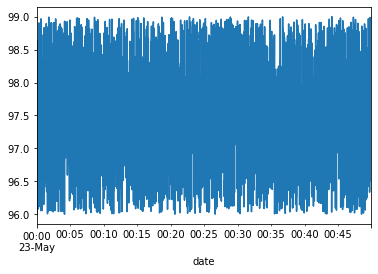

In [39]:
data_healthcare['body_temp'].plot()

<AxesSubplot:xlabel='date'>

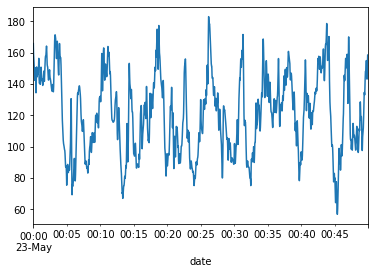

In [40]:
data_healthcare['CGM'].plot()

<AxesSubplot:xlabel='date'>

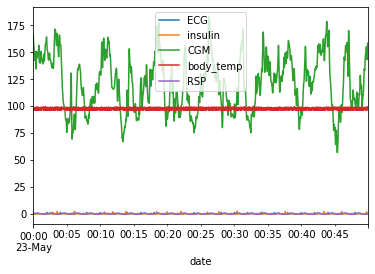

In [41]:
data_healthcare.plot()

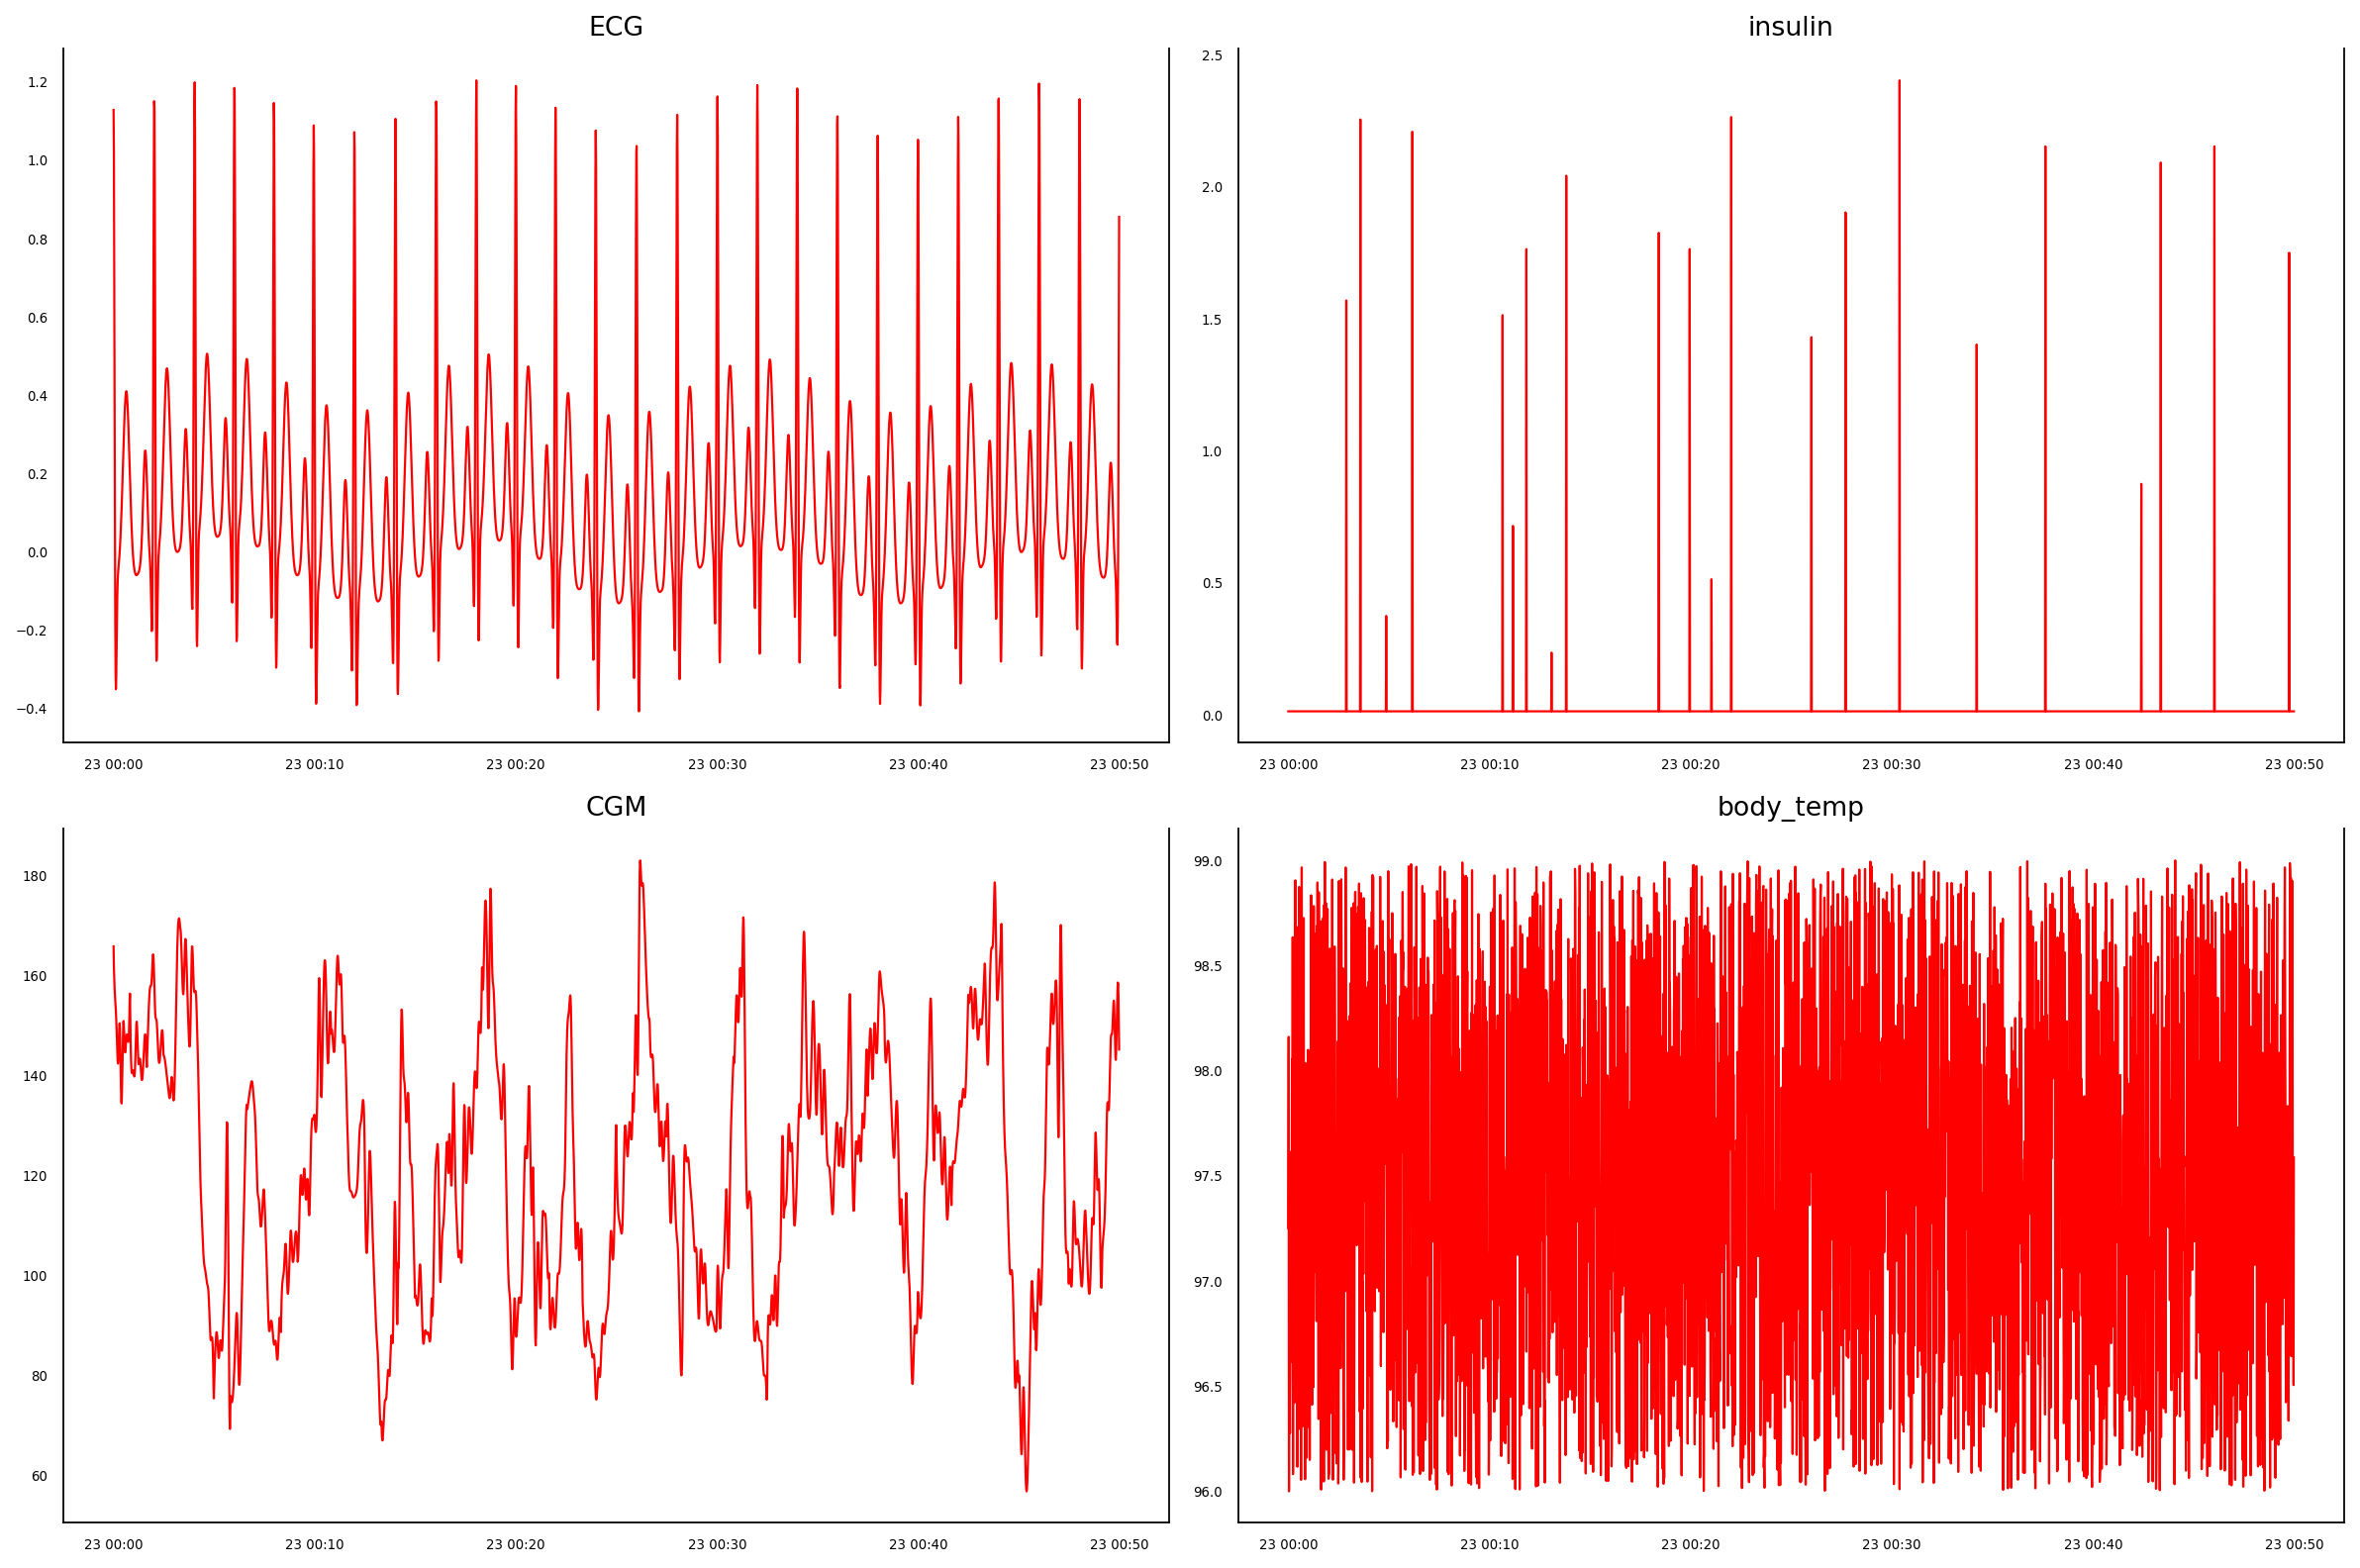

In [42]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2,dpi=160, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    data = data_healthcare[data_healthcare.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(data_healthcare.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_healthcare)
data_healthcare=scaler.transform(data_healthcare)


In [44]:
data_healthcare

array([[0.95314819, 0.        , 0.8638245 , 0.41700712, 0.50783499],
       [0.88424582, 0.        , 0.83044165, 0.72038199, 0.53346389],
       [0.71432602, 0.        , 0.81187431, 0.        , 0.55889086],
       ...,
       [0.39385454, 0.        , 0.78276408, 0.43952959, 0.3984611 ],
       [0.58600688, 0.        , 0.73492812, 0.16840278, 0.4236109 ],
       [0.78374632, 0.        , 0.70025687, 0.52909907, 0.44912246]])

In [45]:
data_healthcare=pd.DataFrame(data_healthcare, columns=["ECG","insulin","CGM","body_temp","RSP"])

In [46]:
import numpy as np
def data_to_X_y3(data_healthcare, window_size=10):
    data_healthcare_as_np = data_healthcare.to_numpy()
    X = []
    y = []
    for i in range(len(data_healthcare_as_np)-window_size):
        row = [r for r in data_healthcare_as_np[i:i+window_size]]
        X.append(row)
        label = [data_healthcare_as_np[i+window_size][0], data_healthcare_as_np[i+window_size][1],data_healthcare_as_np[i+window_size][2],data_healthcare_as_np[i+window_size][3],data_healthcare_as_np[i+window_size][4]]
        y.append(label)
    return np.array(X), np.array(y)



In [47]:
X3, y3 = data_to_X_y3(data_healthcare,300)
X3.shape, y3.shape

((2700, 300, 5), (2700, 5))

In [48]:
X3_train, y3_train = X3[:1900], y3[:1900]
X3_val, y3_val = X3[1900:2300], y3[1900:2300]
X3_test, y3_test = X3[2300:], y3[2300:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((1900, 300, 5), (1900, 5), (400, 300, 5), (400, 5), (400, 300, 5), (400, 5))

In [49]:
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [50]:
model1 = Sequential()
model1.add(InputLayer((300, 5)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(5, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
Total params: 18,485
Trainable params: 18,485
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError 
from keras.optimizers import Adam

In [52]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [53]:
model1.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=70, callbacks=[cp1])

Epoch 1/70
60/60 [==============================] - ETA: 0s - loss: 0.1379 - root_mean_squared_error: 0.3714

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 20s 280ms/step - loss: 0.1379 - root_mean_squared_error: 0.3714 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2961
Epoch 2/70
60/60 [==============================] - ETA: 0s - loss: 0.0815 - root_mean_squared_error: 0.2855

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 15s 244ms/step - loss: 0.0815 - root_mean_squared_error: 0.2855 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2401
Epoch 3/70
60/60 [==============================] - ETA: 0s - loss: 0.0664 - root_mean_squared_error: 0.2576

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 15s 250ms/step - loss: 0.0664 - root_mean_squared_error: 0.2576 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2295
Epoch 4/70
60/60 [==============================] - ETA: 0s - loss: 0.0624 - root_mean_squared_error: 0.2497

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 19s 318ms/step - loss: 0.0624 - root_mean_squared_error: 0.2497 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2221
Epoch 5/70
60/60 [==============================] - ETA: 0s - loss: 0.0587 - root_mean_squared_error: 0.2424

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 16s 263ms/step - loss: 0.0587 - root_mean_squared_error: 0.2424 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2152
Epoch 6/70
60/60 [==============================] - ETA: 0s - loss: 0.0554 - root_mean_squared_error: 0.2354

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 14s 242ms/step - loss: 0.0554 - root_mean_squared_error: 0.2354 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2094
Epoch 7/70
60/60 [==============================] - ETA: 0s - loss: 0.0521 - root_mean_squared_error: 0.2283

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 17s 295ms/step - loss: 0.0521 - root_mean_squared_error: 0.2283 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2025
Epoch 8/70
60/60 [==============================] - ETA: 0s - loss: 0.0492 - root_mean_squared_error: 0.2217

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 17s 279ms/step - loss: 0.0492 - root_mean_squared_error: 0.2217 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 9/70
60/60 [==============================] - ETA: 0s - loss: 0.0466 - root_mean_squared_error: 0.2158

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 17s 287ms/step - loss: 0.0466 - root_mean_squared_error: 0.2158 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 10/70
60/60 [==============================] - ETA: 0s - loss: 0.0444 - root_mean_squared_error: 0.2107

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 20s 337ms/step - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 11/70
60/60 [==============================] - ETA: 0s - loss: 0.0423 - root_mean_squared_error: 0.2058

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 16s 273ms/step - loss: 0.0423 - root_mean_squared_error: 0.2058 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1846
Epoch 12/70
60/60 [==============================] - ETA: 0s - loss: 0.0405 - root_mean_squared_error: 0.2012

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 16s 262ms/step - loss: 0.0405 - root_mean_squared_error: 0.2012 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1811
Epoch 13/70
60/60 [==============================] - ETA: 0s - loss: 0.0388 - root_mean_squared_error: 0.1970

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 18s 297ms/step - loss: 0.0388 - root_mean_squared_error: 0.1970 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1782
Epoch 14/70
60/60 [==============================] - ETA: 0s - loss: 0.0373 - root_mean_squared_error: 0.1931

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 21s 347ms/step - loss: 0.0373 - root_mean_squared_error: 0.1931 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1754
Epoch 15/70
60/60 [==============================] - ETA: 0s - loss: 0.0359 - root_mean_squared_error: 0.1896

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 21s 352ms/step - loss: 0.0359 - root_mean_squared_error: 0.1896 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 16/70
60/60 [==============================] - ETA: 0s - loss: 0.0347 - root_mean_squared_error: 0.1863

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 25s 415ms/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1712
Epoch 17/70
60/60 [==============================] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1834

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 22s 369ms/step - loss: 0.0336 - root_mean_squared_error: 0.1834 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1696
Epoch 18/70
60/60 [==============================] - ETA: 0s - loss: 0.0327 - root_mean_squared_error: 0.1809

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 22s 377ms/step - loss: 0.0327 - root_mean_squared_error: 0.1809 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 19/70
60/60 [==============================] - ETA: 0s - loss: 0.0319 - root_mean_squared_error: 0.1786

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 19s 321ms/step - loss: 0.0319 - root_mean_squared_error: 0.1786 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1662
Epoch 20/70
60/60 [==============================] - ETA: 0s - loss: 0.0311 - root_mean_squared_error: 0.1764

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 21s 354ms/step - loss: 0.0311 - root_mean_squared_error: 0.1764 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1651
Epoch 21/70
60/60 [==============================] - ETA: 0s - loss: 0.0305 - root_mean_squared_error: 0.1745

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 19s 319ms/step - loss: 0.0305 - root_mean_squared_error: 0.1745 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1646
Epoch 22/70
60/60 [==============================] - ETA: 0s - loss: 0.0300 - root_mean_squared_error: 0.1731

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 20s 340ms/step - loss: 0.0300 - root_mean_squared_error: 0.1731 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 23/70
60/60 [==============================] - ETA: 0s - loss: 0.0294 - root_mean_squared_error: 0.1715

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 23s 392ms/step - loss: 0.0294 - root_mean_squared_error: 0.1715 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1629
Epoch 24/70
60/60 [==============================] - ETA: 0s - loss: 0.0289 - root_mean_squared_error: 0.1700

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 25s 414ms/step - loss: 0.0289 - root_mean_squared_error: 0.1700 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1610
Epoch 25/70
60/60 [==============================] - ETA: 0s - loss: 0.0285 - root_mean_squared_error: 0.1688

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 19s 316ms/step - loss: 0.0285 - root_mean_squared_error: 0.1688 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 26/70
60/60 [==============================] - ETA: 0s - loss: 0.0280 - root_mean_squared_error: 0.1674

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 20s 334ms/step - loss: 0.0280 - root_mean_squared_error: 0.1674 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1590
Epoch 27/70
60/60 [==============================] - ETA: 0s - loss: 0.0276 - root_mean_squared_error: 0.1662

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 15s 253ms/step - loss: 0.0276 - root_mean_squared_error: 0.1662 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 28/70
60/60 [==============================] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1648

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 15s 256ms/step - loss: 0.0272 - root_mean_squared_error: 0.1648 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 29/70
60/60 [==============================] - ETA: 0s - loss: 0.0268 - root_mean_squared_error: 0.1637

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 18s 302ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1559
Epoch 30/70
60/60 [==============================] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.1627

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 18s 305ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1555
Epoch 31/70
60/60 [==============================] - ETA: 0s - loss: 0.0262 - root_mean_squared_error: 0.1618

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 25s 430ms/step - loss: 0.0262 - root_mean_squared_error: 0.1618 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1543
Epoch 32/70
60/60 [==============================] - ETA: 0s - loss: 0.0259 - root_mean_squared_error: 0.1608

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 25s 421ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1541
Epoch 33/70
60/60 [==============================] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.1599

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


60/60 [==============================] - 20s 337ms/step - loss: 0.0256 - root_mean_squared_error: 0.1599 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1531
Epoch 34/70
60/60 [==============================] - 10s 166ms/step - loss: 0.0254 - root_mean_squared_error: 0.1592 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1541
Epoch 35/70
45/60 [=====================>........] - ETA: 2s - loss: 0.0251 - root_mean_squared_error: 0.1585

In [ ]:
def plot_predictions2(model, X, y, start=0, end=30):
    predictions = model.predict(X)
    ECG_preds, insulin_preds,CGM_preds,body_temp_preds,RSP_preds = predictions[:, 0],       predictions[:,1],predictions[:,2],predictions[:, 3],predictions[:, 4]
    ECG_actuals, insulin_actuals,body_temp_actuals,CGM_actuals,RSP_actuals = y[:, 0], y[:, 1],y[:, 2],y[:, 3],y[:, 4]
    df = pd.DataFrame(data={'ECG Predictions': ECG_preds,
                          'ECG Actuals':ECG_actuals,
                          'insulin Predictions': insulin_preds,
                          'insulin Actuals': insulin_actuals,
                          'body_temp Predictions': body_temp_preds,
                          'body_temp Actuals': body_temp_actuals,
                          'CGM Predictions': CGM_preds,
                          'CGM Actuals': CGM_actuals,
                            'RSP Predictions': RSP_preds,
                          'RSP Actuals': RSP_actuals
                          })
    plt.plot(df['ECG Predictions'][start:end])
    plt.plot(df['ECG Actuals'][start:end])
    plt.plot(df['insulin Predictions'][start:end])
    plt.plot(df['insulin Actuals'][start:end])
    plt.plot(df['body_temp Predictions'][start:end])
    plt.plot(df['body_temp Actuals'][start:end])
    plt.plot(df['CGM Predictions'][start:end])
    plt.plot(df['CGM Actuals'][start:end])
    plt.plot(df['RSP Predictions'][start:end])
    plt.plot(df['RSP Actuals'][start:end])
    return df[start:end]

13/13 [==============================] - 1s 56ms/step


,ECG Predictions,ECG Actuals,insulin Predictions,insulin Actuals,body_temp Predictions,body_temp Actuals,CGM Predictions,CGM Actuals,RSP Predictions,RSP Actuals
0,0.207348,0.240130,0.013378,0.000000,0.546414,0.809154,0.773498,0.277247,0.055966,0.066322
1,0.217543,0.248871,0.013468,0.000000,0.540108,0.782675,0.773884,0.348732,0.048977,0.054176
2,0.237178,0.259701,0.014984,0.869814,0.541585,0.756753,0.763528,0.283904,0.040219,0.043296
3,0.308032,0.272770,0.037235,0.000000,0.612028,0.732508,0.734874,0.085858,0.004883,0.033710
4,0.272632,0.288013,0.011567,0.000000,0.560057,0.711088,0.763490,0.521791,0.025979,0.025440
5,0.284303,0.305148,0.008858,0.000000,0.540236,0.693698,0.752168,0.788553,0.031239,0.018506
6,0.307814,0.323676,0.007710,0.000000,0.530334,0.681598,0.731988,0.942709,0.034479,0.012925
7,0.331271,0.342884,0.004860,0.000000,0.523109,0.676094,0.711582,0.497294,0.038163,0.008708
8,0.348939,0.361840,0.000608,0.000000,0.528241,0.678506,0.688034,0.593781,0.033283,0.005866
9,0.361181,0.379489,-0.004167,0.000000,0.518969,0.689891,0.673193,0.290815,0.036131,0.004403


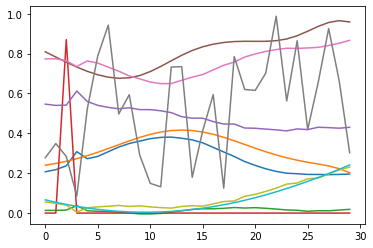

In [ ]:
plot_predictions2(model1, X3_test, y3_test)

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers import Flatten
model2= Sequential()
model2.add(InputLayer((300, 5)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(5, 'linear'))
model2.summary()

cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 299, 64)           704       
                                                                 
 flatten_5 (Flatten)         (None, 19136)             0         
                                                                 
 dense_16 (Dense)            (None, 8)                 153096    
                                                                 
 dense_17 (Dense)            (None, 5)                 45        
                                                                 
Total params: 153,845
Trainable params: 153,845
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=80, callbacks=[cp2])

Epoch 1/80
58/60 [============================>.] - ETA: 0s - loss: 0.0407 - root_mean_squared_error: 0.2018

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 26ms/step - loss: 0.0405 - root_mean_squared_error: 0.2012 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 2/80
60/60 [==============================] - ETA: 0s - loss: 0.0275 - root_mean_squared_error: 0.1657

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.0275 - root_mean_squared_error: 0.1657 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1596
Epoch 3/80
57/60 [===========================>..] - ETA: 0s - loss: 0.0252 - root_mean_squared_error: 0.1587

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 38ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 4/80
60/60 [==============================] - 1s 13ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1559
Epoch 5/80
55/60 [==========================>...] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.1502

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.0228 - root_mean_squared_error: 0.1509 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511
Epoch 6/80
60/60 [==============================] - 1s 14ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1540
Epoch 7/80
57/60 [===========================>..] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1462

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 28ms/step - loss: 0.0213 - root_mean_squared_error: 0.1460 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1497
Epoch 8/80
55/60 [==========================>...] - ETA: 0s - loss: 0.0208 - root_mean_squared_error: 0.1443

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.0207 - root_mean_squared_error: 0.1438 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466
Epoch 9/80
60/60 [==============================] - 1s 12ms/step - loss: 0.0198 - root_mean_squared_error: 0.1409 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1483
Epoch 10/80
58/60 [============================>.] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1393

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1448
Epoch 11/80
60/60 [==============================] - 1s 12ms/step - loss: 0.0188 - root_mean_squared_error: 0.1370 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1474
Epoch 12/80
60/60 [==============================] - 1s 13ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 13/80
59/60 [============================>.] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1343

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 25ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 14/80
58/60 [============================>.] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1334

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 27ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1435
Epoch 15/80
60/60 [==============================] - 1s 14ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1522
Epoch 16/80
60/60 [==============================] - 1s 11ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1439
Epoch 17/80
60/60 [==============================] - 1s 12ms/step - loss: 0.0168 - root_mean_squared_error: 0.1296 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1459
Epoch 18/80
56/60 [===========================>..] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1289

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 25ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 19/80
60/60 [==============================] - 1s 12ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1454
Epoch 20/80
60/60 [==============================] - 1s 13ms/step - loss: 0.0156 - root_mean_squared_error: 0.1249 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1451
Epoch 21/80
60/60 [==============================] - 1s 15ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1428
Epoch 22/80
58/60 [============================>.] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.1228

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


60/60 [==============================] - 2s 27ms/step - loss: 0.0151 - root_mean_squared_error: 0.1229 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1415
Epoch 23/80
60/60 [==============================] - 1s 11ms/step - loss: 0.0150 - root_mean_squared_error: 0.1225 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 24/80
60/60 [==============================] - 1s 12ms/step - loss: 0.0146 - root_mean_squared_error: 0.1206 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1435
Epoch 25/80
60/60 [==============================] - 1s 13ms/step - loss: 0.0144 - root_mean_squared_error: 0.1202 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 26/80
60/60 [==============================] - 1s 12ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 27/80
60/60 [==============================] - 1s 14ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0202 - val_root_mean_sq

13/13 [==============================] - 0s 4ms/step


,ECG Predictions,ECG Actuals,insulin Predictions,insulin Actuals,body_temp Predictions,body_temp Actuals,CGM Predictions,CGM Actuals,RSP Predictions,RSP Actuals
0,0.135099,0.240130,0.067903,0.000000,0.469357,0.809154,0.866808,0.277247,0.053294,0.066322
1,0.222194,0.248871,-0.015210,0.000000,0.578602,0.782675,0.784303,0.348732,0.059801,0.054176
2,0.360194,0.259701,-0.021374,0.869814,0.793778,0.756753,0.763738,0.283904,0.086090,0.043296
3,0.316319,0.272770,-0.176745,0.000000,0.457283,0.732508,0.702154,0.085858,0.133439,0.033710
4,0.338591,0.288013,-0.041199,0.000000,0.676325,0.711088,0.821774,0.521791,0.044510,0.025440
5,0.380443,0.305148,-0.050843,0.000000,0.559439,0.693698,0.729850,0.788553,0.136058,0.018506
6,0.333314,0.323676,-0.074130,0.000000,0.568421,0.681598,0.691829,0.942709,0.051218,0.012925
7,0.344698,0.342884,-0.003754,0.000000,0.587995,0.676094,0.702509,0.497294,0.053819,0.008708
8,0.303678,0.361840,0.017850,0.000000,0.316574,0.678506,0.605270,0.593781,0.189022,0.005866
9,0.239546,0.379489,-0.083856,0.000000,0.190620,0.689891,0.550792,0.290815,0.192567,0.004403


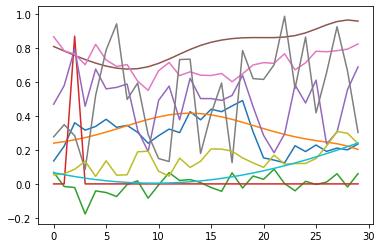

In [ ]:
plot_predictions2(model2, X3_test, y3_test)

In [ ]:
from keras.layers import GRU
model3 = Sequential()
model3.add(InputLayer((300, 5)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(5, 'linear'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                13632     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 5)                 45        
                                                                 
Total params: 14,197
Trainable params: 14,197
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=20, callbacks=[cp3])

Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 0.0242 - root_mean_squared_error: 0.1557

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 186ms/step - loss: 0.0242 - root_mean_squared_error: 0.1557 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1492
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1548

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 180ms/step - loss: 0.0240 - root_mean_squared_error: 0.1548 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1541

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 183ms/step - loss: 0.0237 - root_mean_squared_error: 0.1541 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1482
Epoch 4/20
60/60 [==============================] - 7s 117ms/step - loss: 0.0236 - root_mean_squared_error: 0.1536 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 5/20
60/60 [==============================] - 7s 122ms/step - loss: 0.0234 - root_mean_squared_error: 0.1530 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 6/20
60/60 [==============================] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.1528

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 14s 233ms/step - loss: 0.0233 - root_mean_squared_error: 0.1528 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1478
Epoch 7/20
60/60 [==============================] - 9s 144ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 8/20
60/60 [==============================] - 7s 120ms/step - loss: 0.0232 - root_mean_squared_error: 0.1522 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 9/20
60/60 [==============================] - ETA: 0s - loss: 0.0231 - root_mean_squared_error: 0.1520

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 185ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1476
Epoch 10/20
60/60 [==============================] - 7s 125ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1476
Epoch 11/20
60/60 [==============================] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1517

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 192ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1475
Epoch 12/20
60/60 [==============================] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1517

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 182ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1475
Epoch 13/20
60/60 [==============================] - ETA: 0s - loss: 0.0228 - root_mean_squared_error: 0.1511

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 11s 186ms/step - loss: 0.0228 - root_mean_squared_error: 0.1511 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1472
Epoch 14/20
60/60 [==============================] - 7s 117ms/step - loss: 0.0228 - root_mean_squared_error: 0.1511 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1472
Epoch 15/20
60/60 [==============================] - 7s 122ms/step - loss: 0.0228 - root_mean_squared_error: 0.1509 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1473
Epoch 16/20
60/60 [==============================] - 7s 121ms/step - loss: 0.0227 - root_mean_squared_error: 0.1508 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1477
Epoch 17/20
60/60 [==============================] - 7s 121ms/step - loss: 0.0227 - root_mean_squared_error: 0.1507 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1472
Epoch 18/20
60/60 [==============================] - 8s 128ms/step - loss: 0.0226 - root_mean_squared_error: 0.1505 - val_loss: 0.0217 - val_root_

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


60/60 [==============================] - 12s 194ms/step - loss: 0.0226 - root_mean_squared_error: 0.1503 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1470


In [ ]:
plot_predictions2(model3, X3_test, y3_test)
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

NameError: name 'plot_predictions2' is not defined

## FIN